# **Palmer Penguins**
*by Neil Tynan @ATU*

![Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)
###### *“Artwork by @allison_horst”*

## Overview
***
This notebook contains my analysis of the famous [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/), which was completed as part of my assessment for ATU module 8634 - PRINCIPLES OF DATA ANALYTICS.

Consequently, this workbook aims to complete a number of objectives outlined in the assessment instruction. These objectives include:

1. Source and investigate the Palmer Penguin (PP) dataset.
2. Programmatically explore and visualize the data in it.
3. Identify the types of variables in the dataset and determining which ones might be suitable for analysis.
4. Create a bar chart of approapriate variable in the dataset and a histogram of an appropriate variable in the dataset.
5. Select two variables from the data set and provide an analysis of how correlated they are.

## Loading in the Data
***

Starting at objective 1, our first step involves locating and loading in a relevant copy of the PalmerPenguins dataset. This dataset was originall collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. The dataset contains data on 344 penguins across 3 islands in the Palmer Archipelago, Antarctica. A full overview of the original dataset, and how it was collected, is available on the palmerpenguins [website](https://allisonhorst.github.io/palmerpenguins/).

While the original data set can be viewed at the link above, this was originally designed to work with R (as opposed to Python which this workbook is using). Consequently, we have instead chosen to use [another copy of the dataset](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv) which has been stored in a CSV format (as this is easier for Python to work with). This copy of the dataset is provided by Github user mwaskom who hosts a number of seaborn data repository examples.

In [254]:
# load the penguins data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## Libraries
*** 

Now that we have the PalmerPenguins dataset loaded in, we can start on our next step, programtically exploring and visualising the data in the dataset. However, before we proceed any further with objective 2, we need to load in the relatvant libraries which will facilitate our analysis of the dataframe.

In [255]:
# Data frames.
import pandas as pd

*Pandas - Necessary for the DataFrame data structure due the dataset being available on GItHub in a CSV format (as noted above).* 

In [256]:
# Nummerical arrays
import numpy as np

*Numpy - Enables the generation of a line of best fit.*

In [257]:
# Plotting
import matplotlib.pyplot as plt

*Matlplotlib - Facilitates the plotting and visualisation of the data.*

## Viewing and Testing the Dataset
***

Now that the dataset and our libraries loaded in, we need to try and get a feel for the data stored in it. We'll start with taking a look at the headings and the data in the dataset.

In [258]:
# Looking at an overview of the dataframe
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


So, now we can see that there are seven headings in the database. These contain a variety of different text and numerical values. While the headings themselves are fairly obvious, it would still be useful to To try and get a better understanding of how the database is storing these values, we're going to look at the first row in a bit more detail.

In [259]:
# Look at the first row in detail
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [260]:
# Looking at the data types of each data series
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

We know have a pretty good idea of the shape of the dataset and the types of data in it. With that in mind we can now to start to look at the variables in the variables in it in more detail.



## Variables
***

So from our work above in examining and visualising the dataset, we cam see that there are three text (object) and four numerial (float) dataseries. These are our primary variables and their examination will form the basis of objective 3. To help us better understand how the variables relate to one another, we will examining them in two groups: the object dataseries and the float dataseries.

### Object Dataseries

As we are, comparatively, limited in the amount numerical analysis we can do when it comes to object dataseries, the most important question is how diverse these dataseries are. We need to get an idea of the number unique values present in the three object dataseries. That should give us an idea of how this data splits up the dataset.

In [261]:
# Get the unique values in the species dataseries
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [262]:
# Get the unique values in the island dataseries
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [263]:
# Get the unique values in the sex dataseries
df['sex'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

So, we can see that, exclude NaN returns, we have three species of penguins ('Adelie', 'Chinstrap', 'Gentoo') split across three islands ('Torgersen', 'Biscoe', 'Dream') and subdivided into two sex catagorisations ('MALE', 'FEMALE'). That's a very manageable number of catagories that could be easily broken up. This makes these variables a great target for the first part of objective 4 (creating a bar chart of an appropriate variable).

Text(0.5, 1.0, 'Number of Penguins by Species')

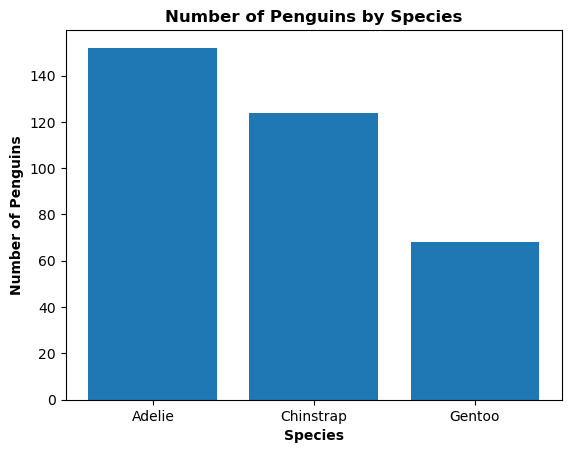

In [264]:
# Define Data
Number = df['species'].value_counts()
Species = df['species'].unique()

width =0.4

plt.bar(Species, Number)

# Define labels
plt.xlabel('Species', fontweight ='bold', size=10)
plt.ylabel('Number of Penguins', fontweight ='bold', size=10)

# Add Title
plt.title('Number of Penguins by Species', fontweight ='bold', size=12)



For example, as you can see in the above chart, the limited number of unique values in the species dataseries makes it very easy to seperate the penguins by species and facilitates the easy analysis of this category. For example, in the above chart, we can clearly see that the Adelie penguins are the most common species followed by Gentoo and then Chinstrap. 





### Float Dataseries

Now that we have a handle on the object data series, next up we need to look at the float values. Given that these are numerical fields, it's highly likely that there's going to be far too much variance amoung the values for us to gain any useful information in looking at the unique values of each dataseries. Instead, let's take a look at the ranges of the dataseries involved.

In [265]:
# Getting an idea of the variation in the floats
df.describe ()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Based off the table above, we can that, while there is a significant amount of variance amoung the different dataseries, Body Mass stands out as returning much larger and more distnct figures than the other three. Consequently, it might be interesting to see how it compares against on of the other three variables. Let's take Flipper Length, the dataseries returning the second largest set of numerical returns, as our second correlation.

With them selected, let's take a more indepth look at both dataseries. By converting both dataseries into histograms, we should be able to faciliatate our analysis and, at the same time, complete the second part of objective 4.

In [274]:
# Look at Body Mass
df['body_mass_g']

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 333, dtype: float64

There isn't a lot of new information here, beyond what we already know. However, looking at the data now, it obvious that there are a number of null (NaN) values in it. That's something that we will need to address going forward.

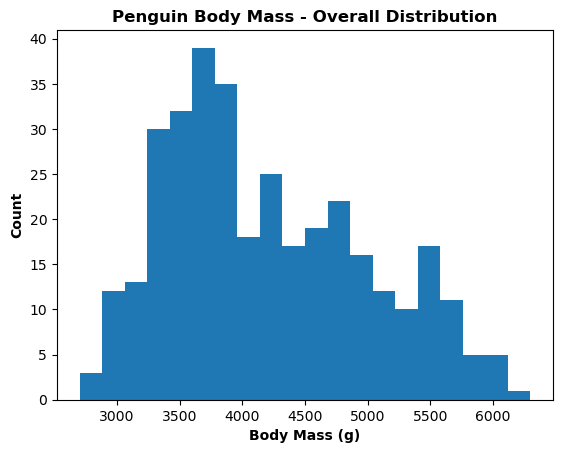

In [267]:
# Plot a histogram of Body Mass
plt1=plt.hist(df['body_mass_g'], bins=20)

# Define labels
plt.xlabel('Body Mass (g)', fontweight ='bold', size=10)
plt.ylabel('Count', fontweight ='bold', size=10)

# Add Title
plt.title('Penguin Body Mass - Overall Distribution', fontweight ='bold', size=12)

# Show graph
plt.show()

The results for Body Mass return a fairly unimodal histogram, with a large number of results clustered around bin six. We now need to see how this compares to the histogram for flipper length.

In [268]:
# Look at Flipper Length
df['flipper_length_mm']

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339      NaN
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 344, dtype: float64

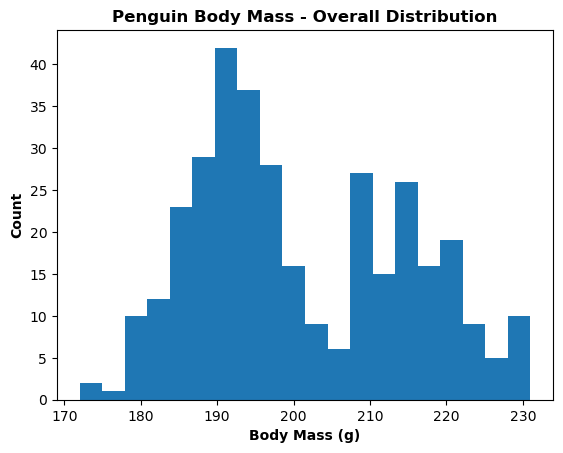

In [269]:
# Plot a histogram of Flipper Length
plt2=plt.hist(df['flipper_length_mm'], bins=20)

# Define labels
plt.xlabel('Body Mass (g)', fontweight ='bold', size=10)
plt.ylabel('Count', fontweight ='bold', size=10)

# Add Title
plt.title('Penguin Body Mass - Overall Distribution', fontweight ='bold', size=12)

# Show graph
plt.show()

Interestingly, we can again we can see strong clustering around bin six (though the graph is more bimodal this time). This would seem to bear out the idea that there is a degree of correlation between the two variables and makes them an excellent choice for comparison. However, before we can make any concrete judgements we will need to compare the two dataseries in more detail.

## Comparing the Selected Variables
***

With our two main variables selected, we can now see about comparing them in detail. Our first step in this process is going to be to generate ascatter chart to see if we can determined if there is any linear corelation between the two variables.

Text(0.5, 1.0, 'Palmer Penguins Data Set')

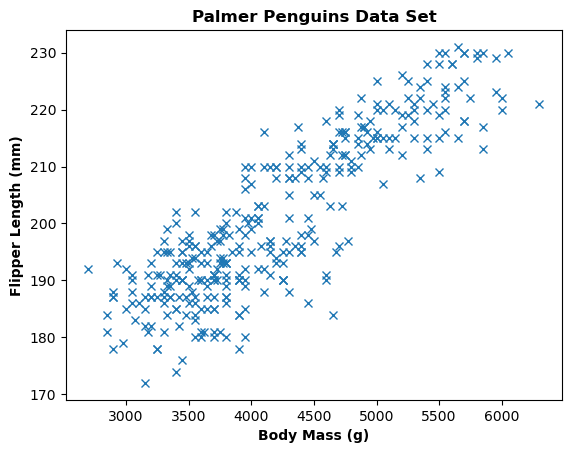

In [270]:
# Convert Body Mass and Flipper Length into short-form
bmass = df['body_mass_g']
flen = df['flipper_length_mm']


# Plot a scatter graph of Body Mass vs Flipper Length
fig, ax = plt.subplots()
scatter1=ax.plot(bmass, flen, 'x') # 'x' is added to the plot to prevent pyplot from drawing lines between each individual point by registering each point as an x.

# Define Labels
ax.set_xlabel ('Body Mass (g)', fontweight ='bold', size=10)
ax.set_ylabel ('Flipper Length (mm)', fontweight ='bold', size=10)

# Add Title
ax.set_title ('Palmer Penguins Data Set', fontweight ='bold', size=12)



The results of the scatter chart do appear to demonstrate a linear relationship between the two values. However, to be sure of these suspicions, we are going to need to fit a line to graph before we can be sure of how linear the relationship between the two variables is.

However, before we can do that, there is one other thing we need to rectify. As we can recall from the Float Dataseries section, there are some entries in the dataset where NaN has been used to note a lack of available data. The inclusion of a non-numerical value in what are, otherwise, entirely numeric, float based data series, is going to prove problematic later on when we are attempting to examine these variables and generate a line of best fit. In order to prevent these penguins from potentially throwing off our data, we are going to remove all of these penguins from the dataframe.

In [271]:
# Drop all instances of NaN from the dataset
df=df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Now that we've removed the null values from the dataset we should be able to fit a straight line between Body Mass and Flipper Length and then fit that line onto the scatter char.

In [273]:
# Convert Body Mass and Flipper Length into short-form
bmass = df['body_mass_g']
flen = df['flipper_length_mm']

# Fit a straight line between x and y
m, c = np.polyfit(bmass, flen, 1)
m, c

(0.01519526481521767, 137.0396208922547)

Text(0.5, 1.0, 'Palmer Penguins Data Set')

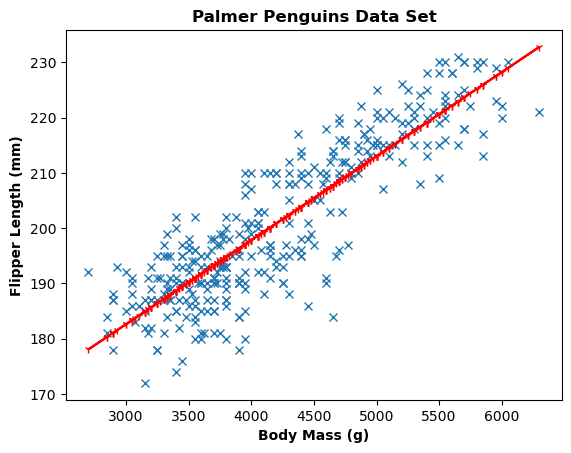

In [276]:

# Plot a scatter graph of Body Mass vs Flipper Length
fig, ax = plt.subplots()
scatter1=ax.plot(bmass, flen, 'x') # 'x' is added to the plot to prevent pyplot from drawing lines between each individual point by registering each point as an x.
ax.plot(bmass, m*bmass + c, 'r-1')

# Define Labels
ax.set_xlabel ('Body Mass (g)', fontweight ='bold', size=10)
ax.set_ylabel ('Flipper Length (mm)', fontweight ='bold', size=10)

# Add Title
ax.set_title ('Palmer Penguins Data Set', fontweight ='bold', size=12)

It can be seen from that graph that there is a clear linear relationship between these two variables. While there are remarkably few significant outliers, the fact that so many of the points are spread out from the line probably indicates a [low positive correlation](https://www.scribbr.com/statistics/correlation-coefficient/). Still, a positive correlation none the less.

In [ ]:
# Measuring the correlation
np.corrcoef(bmass,flen)

array([[1.       , 0.8729789],
       [0.8729789, 1.       ]])

This is further testified to by the correlation coefficiant for the two variables, which we can see is 0.87. While there is no absolute consensus on what exact number demonstrates a strong postive relationship, any correation where r > 0.75 is generally [considered quite strong](https://www.statology.org/what-is-a-strong-correlation/). 

Our data, consequently, seems to indicate that heavier penguins have larger flippers. On the whole, this is probably somewhat unsuprising. It is, perhaps, not an unreasble inference that a heavier is, the larger they are. And a larger penguin will, on average, have a larger flippers. However, our data has allowed us to lend a far greater degree of certainty to this hypothesis. In summation, the bigger the penguin, the bigger the feet.

*** 

### End